# WeightWatcher

https://calculationconsulting.com

In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [72]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Quick start example

### 1.1 Import your model (Keras or PyTorch)

In [2]:
from keras.models import load_model
from keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


### 1.2 Run WeightWatcher

In [3]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze()

2019-12-24 14:00:47,407 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:00:47,408 INFO Analyzing model 'vgg16' with 23 layers
2019-12-24 14:00:48,324 INFO ### Printing results ###
2019-12-24 14:00:49,763 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-12-24 14:00:49,763 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-12-24 14:00:49,764 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-12-24 14:00:49,765 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


In [4]:
results

{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0x106968cf8>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  0: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 1/9 (3,64): Skipping: too small (<50)'},
  1: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 2/9 (3,64): Skipping: too small (<50)'},
  2: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 3/9 (3,64): Skipping: too small (<50)'},
  3: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 4/9 (3,64): Skipping: too small (<50)'},
  4: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 5/9 (3,64): Skipping: too small (<50)'},
  5: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 6/9 (3,64): Skipping: too small (<50)'},
  6: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': 'Weight matrix 7/9 

In [5]:
watcher.get_summary()

{'norm': 4.0186157,
 'norm_compound': 6.753572,
 'lognorm': 0.5674789,
 'lognorm_compound': 0.69472766}

In [6]:
watcher.print_results()

2019-12-24 14:00:49,835 INFO ### Printing results ###
2019-12-24 14:00:51,212 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-12-24 14:00:51,212 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-12-24 14:00:51,213 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-12-24 14:00:51,214 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


## 2. Advanced examples

## 2.1 Filter by layer type (CONV1D, CONV2D, DENSE)

In this example we are interested in the DENSE layers only

In [7]:
from keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=ww.LAYER_TYPE.DENSE)

2019-12-24 14:00:54,204 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:00:54,205 INFO Analyzing model 'vgg16' with 23 layers
2019-12-24 14:00:54,606 INFO ### Printing results ###
2019-12-24 14:00:54,878 INFO Norm: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-12-24 14:00:54,879 INFO Norm compound: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-12-24 14:00:54,879 INFO LogNorm: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009
2019-12-24 14:00:54,880 INFO LogNorm compound: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb38ad7390>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 2: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb38acde80>,
  'message': 'Skipping (Layer not supported)'},
 4: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 5: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb38b304e0>,
  'message': 'Skipping (Layer not supported)'},
 7: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 8: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested

In [8]:
watcher.print_results()

2019-12-24 14:00:54,899 INFO ### Printing results ###
2019-12-24 14:00:55,144 INFO Norm: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-12-24 14:00:55,145 INFO Norm compound: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-12-24 14:00:55,146 INFO LogNorm: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009
2019-12-24 14:00:55,146 INFO LogNorm compound: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009


## 2.2 Filter by multiple layer types

In this example we are interested in the CONV1D and DENSE layers.

Filter the layers using a bitmask.

In [9]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=ww.LAYER_TYPE.CONV1D|ww.LAYER_TYPE.DENSE)

2019-12-24 14:00:55,162 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:00:55,163 INFO Analyzing model 'vgg16' with 23 layers
2019-12-24 14:00:55,455 INFO ### Printing results ###
2019-12-24 14:00:55,696 INFO Norm: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-12-24 14:00:55,696 INFO Norm compound: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-12-24 14:00:55,697 INFO LogNorm: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009
2019-12-24 14:00:55,697 INFO LogNorm compound: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb38ad7390>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 2: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb38acde80>,
  'message': 'Skipping (Layer not supported)'},
 4: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 5: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb38b304e0>,
  'message': 'Skipping (Layer not supported)'},
 7: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 8: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested

## 2.3 Filter by layer Ids

In [10]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=[20])

2019-12-24 14:00:55,717 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:00:55,718 INFO Analyzing model 'vgg16' with 23 layers
2019-12-24 14:00:55,976 INFO ### Printing results ###
2019-12-24 14:00:56,195 INFO Norm: min: 23.428979873657227, max: 23.428979873657227, avg: 23.428979873657227
2019-12-24 14:00:56,197 INFO Norm compound: min: 23.428979873657227, max: 23.428979873657227, avg: 23.428979873657227
2019-12-24 14:00:56,197 INFO LogNorm: min: 1.369753360748291, max: 1.369753360748291, avg: 1.369753360748291
2019-12-24 14:00:56,198 INFO LogNorm compound: min: 1.369753360748291, max: 1.369753360748291, avg: 1.369753360748291


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb38ad7390>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 1: {'id': 1,
  'type': <keras.layers.convolutional.Conv2D at 0xb38ad7a58>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 2: {'id': 2,
  'type': <keras.layers.convolutional.Conv2D at 0xb38ad7ac8>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb38acde80>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 4: {'id': 4,
  'type': <keras.layers.convolutional.Conv2D at 0xb38ad52e8>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 5: {'id': 5,
  'type': <keras.layers.convolutional.Conv2D at 0xb38b165c0>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb38b304e0>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 7: {'id': 7,
  'type': <keras.l

## 2.4 Get the return values per layer

In [11]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze()

2019-12-24 14:00:56,216 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:00:56,216 INFO Analyzing model 'vgg16' with 23 layers
2019-12-24 14:00:56,635 INFO ### Printing results ###
2019-12-24 14:00:58,026 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-12-24 14:00:58,026 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-12-24 14:00:58,027 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-12-24 14:00:58,028 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


In [12]:
for layer_id, result in results.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))    

Layer 2, Slice 0: Lognorm: 0.3978934586048126
Layer 2, Slice 1: Lognorm: 0.45358702540397644
Layer 2, Slice 2: Lognorm: 0.40578144788742065
Layer 2, Slice 3: Lognorm: 0.45428669452667236
Layer 2, Slice 4: Lognorm: 0.49695152044296265
Layer 2, Slice 5: Lognorm: 0.45737624168395996
Layer 2, Slice 6: Lognorm: 0.4044671952724457
Layer 2, Slice 7: Lognorm: 0.4511153995990753
Layer 2, Slice 8: Lognorm: 0.3889707922935486
Layer 4, Slice 0: Lognorm: 0.44109997153282166
Layer 4, Slice 1: Lognorm: 0.4613628089427948
Layer 4, Slice 2: Lognorm: 0.4370166063308716
Layer 4, Slice 3: Lognorm: 0.4667660593986511
Layer 4, Slice 4: Lognorm: 0.5201410055160522
Layer 4, Slice 5: Lognorm: 0.46935534477233887
Layer 4, Slice 6: Lognorm: 0.4464665651321411
Layer 4, Slice 7: Lognorm: 0.48161619901657104
Layer 4, Slice 8: Lognorm: 0.4471622705459595
Layer 5, Slice 0: Lognorm: 0.45507872104644775
Layer 5, Slice 1: Lognorm: 0.4839082956314087
Layer 5, Slice 2: Lognorm: 0.4593982994556427
Layer 5, Slice 3: Lognorm

## 2.5 Power Law Fit

In [13]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

2019-12-24 14:00:58,060 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:00:58,061 INFO Analyzing model 'vgg16' with 23 layers
2019-12-24 14:05:27,511 INFO ### Printing results ###
2019-12-24 14:05:28,882 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-12-24 14:05:28,883 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-12-24 14:05:28,883 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-12-24 14:05:28,884 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639
2019-12-24 14:05:28,885 INFO Alpha: min: 1.2069766877846264, max: 4.558140877329403, avg: 2.7189644206475023
2019-12-24 14:05:28,885 INFO Alpha compound: min: 1.2176340849793623, max: 3.9603022474454272, avg: 2.6610

## 2.6 Debug and Custom Logging

### Custom Logging at Debug Level

In [14]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model, logger=logger)

results = watcher.analyze()

INFO:__main__:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:__main__:Analyzing model 'vgg16' with 23 layers
DEBUG:__main__:Layer 1: <keras.engine.input_layer.InputLayer object at 0xb38ad7390>
DEBUG:__main__:Layer 1: Skipping (Layer not supported)
DEBUG:__main__:Layer 2: <keras.layers.convolutional.Conv2D object at 0xb38ad7a58>
DEBUG:__main__:Keras tensor shape detected: 3x64 (NxM), 3x3 (i,j)
DEBUG:__main__:Layer 2: Analyzing 9 weight matrices...
DEBUG:__main__:    Weight matrix 1/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 2/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 3/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 4/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 5/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:    Weight matrix 6/9 (3,64): Skipping: 

DEBUG:__main__:    Weight matrix 6/9 (256,256): Lognorm: 0.5075631737709045
DEBUG:__main__:    Weight matrix 7/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 7/9 (256,256): Lognorm: 0.45727992057800293
DEBUG:__main__:    Weight matrix 8/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 8/9 (256,256): Lognorm: 0.5017167329788208
DEBUG:__main__:    Weight matrix 9/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 9/9 (256,256): Lognorm: 0.4612100124359131
DEBUG:__main__:Layer 10: <keras.layers.convolutional.Conv2D object at 0xb38ad8630>
DEBUG:__main__:Keras tensor shape detected: 256x256 (NxM), 3x3 (i,j)
DEBUG:__main__:Layer 10: Analyzing 9 weight matrices...
DEBUG:__main__:    Weight matrix 1/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 1/9 (256,256): Lognorm: 0.4767092168331146
DEBUG:__main__:    Weight matrix 2/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 2/9 (256,256): Lognorm: 0.5228332281112671
DEBUG:__main__:    Weight

DEBUG:__main__:    Weight matrix 1/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 1/9 (512,512): Lognorm: 0.6483020782470703
DEBUG:__main__:    Weight matrix 2/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 2/9 (512,512): Lognorm: 0.6716188788414001
DEBUG:__main__:    Weight matrix 3/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 3/9 (512,512): Lognorm: 0.6487486958503723
DEBUG:__main__:    Weight matrix 4/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 4/9 (512,512): Lognorm: 0.6313163042068481
DEBUG:__main__:    Weight matrix 5/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (512,512): Lognorm: 0.690161406993866
DEBUG:__main__:    Weight matrix 6/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (512,512): Lognorm: 0.6324495077133179
DEBUG:__main__:    Weight matrix 7/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 7/9 (512,512): Lognorm: 0.6435778141021729
DEBUG:__main__:    Weight matrix 8/

### Disable Logging

In [15]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model, log=False)

results = watcher.analyze()

## 3. pyTorch Models

In [16]:
data = []

In [17]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg16torch", "summary": watcher.get_summary()})

2019-12-24 14:05:34,227 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:05:34,229 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:09:42,933 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:09:44,455 INFO Norm: min: 3.203004837036133, max: 51.2126579284668, avg: 7.801441669464111
INFO:weightwatcher.weightwatcher:Norm: min: 3.203004837036133, max: 51.2126579284668, avg: 7.801441669464111
2019-12-24 14:09:44,456 INFO Norm compound: min: 3.56429123878479, max: 51.2126579284668, avg: 14.09792709350586
INFO:weightwatcher.weightwatcher:Norm compo

In [18]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg16bntorch", "summary": watcher.get_summary()})

2019-12-24 14:09:45,911 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:09:45,913 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:13:50,826 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:13:52,463 INFO Norm: min: 1.9416159391403198, max: 47.83592224121094, avg: 6.997468948364258
INFO:weightwatcher.weightwatcher:Norm: min: 1.9416159391403198, max: 47.83592224121094, avg: 6.997468948364258
2019-12-24 14:13:52,464 INFO Norm compound: min: 2.2552099227905273, max: 47.83592224121094, avg: 13.280407905578613
INFO:weightwatcher.weightwatcher:No

In [19]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg11(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg11torch", "summary": watcher.get_summary()})

2019-12-24 14:13:53,950 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:13:53,951 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:17:37,639 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:17:38,592 INFO Norm: min: 5.2481255531311035, max: 57.39590072631836, avg: 10.107156753540039
INFO:weightwatcher.weightwatcher:Norm: min: 5.2481255531311035, max: 57.39590072631836, avg: 10.107156753540039
2019-12-24 14:17:38,593 INFO Norm compound: min: 5.895910263061523, max: 57.39590072631836, avg: 19.885963439941406
INFO:weightwatcher.weightwatcher:N

In [20]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg11_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg11bntorch", "summary": watcher.get_summary()})

2019-12-24 14:17:40,033 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:17:40,034 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:21:21,319 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:21:22,343 INFO Norm: min: 3.9749603271484375, max: 53.424800872802734, avg: 9.151532173156738
INFO:weightwatcher.weightwatcher:Norm: min: 3.9749603271484375, max: 53.424800872802734, avg: 9.151532173156738
2019-12-24 14:21:22,344 INFO Norm compound: min: 4.532721519470215, max: 53.424800872802734, avg: 19.01651382446289
INFO:weightwatcher.weightwatcher:N

In [21]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg13(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg13torch", "summary": watcher.get_summary()})

2019-12-24 14:21:23,777 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:21:23,778 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:25:09,536 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:25:10,705 INFO Norm: min: 3.4243783950805664, max: 57.03801345825195, avg: 8.586669921875
INFO:weightwatcher.weightwatcher:Norm: min: 3.4243783950805664, max: 57.03801345825195, avg: 8.586669921875
2019-12-24 14:25:10,706 INFO Norm compound: min: 3.7364306449890137, max: 57.03801345825195, avg: 16.972938537597656
INFO:weightwatcher.weightwatcher:Norm com

In [22]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg13_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg13bntorch", "summary": watcher.get_summary()})

2019-12-24 14:25:12,122 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:25:12,124 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:28:52,518 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:28:53,764 INFO Norm: min: 2.1068990230560303, max: 52.42221450805664, avg: 7.682347774505615
INFO:weightwatcher.weightwatcher:Norm: min: 2.1068990230560303, max: 52.42221450805664, avg: 7.682347774505615
2019-12-24 14:28:53,765 INFO Norm compound: min: 2.452697515487671, max: 52.42221450805664, avg: 16.066328048706055
INFO:weightwatcher.weightwatcher:Nor

In [23]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg19(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg19torch", "summary": watcher.get_summary()})

2019-12-24 14:28:55,277 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:28:55,278 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:33:28,339 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:33:30,180 INFO Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
INFO:weightwatcher.weightwatcher:Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
2019-12-24 14:33:30,182 INFO Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
INFO:weightwatcher.weightwatche

In [24]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg19_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(alphas=True)

data.append({"name": "vgg19bntorch", "summary": watcher.get_summary()})

2019-12-24 14:33:31,677 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 14:33:31,678 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 14:37:55,892 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 14:37:57,878 INFO Norm: min: 1.6498754024505615, max: 45.86455154418945, avg: 6.413882255554199
INFO:weightwatcher.weightwatcher:Norm: min: 1.6498754024505615, max: 45.86455154418945, avg: 6.413882255554199
2019-12-24 14:37:57,880 INFO Norm compound: min: 1.9919495582580566, max: 45.86455154418945, avg: 11.5429048538208
INFO:weightwatcher.weightwatcher:Norm

In [25]:
data

[{'name': 'vgg16torch',
  'summary': {'norm': 7.8014417,
   'norm_compound': 14.097927,
   'lognorm': 0.8381871,
   'lognorm_compound': 0.97927845,
   'alpha': 2.89233801062374,
   'alpha_compound': 2.767717801865902,
   'alpha_weighted': 1.405072984118814,
   'alpha_weighted_compound': 1.7930749068678844}},
 {'name': 'vgg16bntorch',
  'summary': {'norm': 6.997469,
   'norm_compound': 13.280408,
   'lognorm': 0.7700977,
   'lognorm_compound': 0.9220765,
   'alpha': 3.099085407095711,
   'alpha_compound': 2.966024122982959,
   'alpha_weighted': 1.0820403179586902,
   'alpha_weighted_compound': 1.5490586351060547}},
 {'name': 'vgg11torch',
  'summary': {'norm': 10.107157,
   'norm_compound': 19.885963,
   'lognorm': 0.9474983,
   'lognorm_compound': 1.1386476,
   'alpha': 2.5724933311485363,
   'alpha_compound': 2.5370047984035393,
   'alpha_weighted': 1.8439950665352716,
   'alpha_weighted_compound': 2.4581932538546676}},
 {'name': 'vgg11bntorch',
  'summary': {'norm': 9.151532,
   'nor

In [26]:
# pytorch Model accuracies 
# https://github.com/Cadene/pretrained-models.pytorch

accuracies = {
    "vgg11torch": 68.970,
    "vgg11bntorch": 70.452,
    "vgg13torch": 69.662,
    "vgg13bntorch": 71.508,
    "vgg16torch": 71.636,
    "vgg16bntorch": 73.518,
    "vgg19torch": 72.080,
    "vgg19bntorch": 74.266,
}

In [27]:
# pytorch Model accuracies 
# https://github.com/Cadene/pretrained-models.pytorch

accuracies5 = {
    "vgg11torch": 88.746,
    "vgg11bntorch": 89.818,
    "vgg13torch": 89.264,
    "vgg13bntorch": 90.494,
    "vgg16torch": 90.354,
    "vgg16bntorch": 91.608,
    "vgg19torch": 90.822,
    "vgg19bntorch": 92.066,
}

### 3.1 Log Norm of Weight Matrices vs Accuracies of models

The following graph demonstrates the linear relationship between the average Log Norm of Weight matrices and the test accuracies of the models (notice we didnt't need the test data):

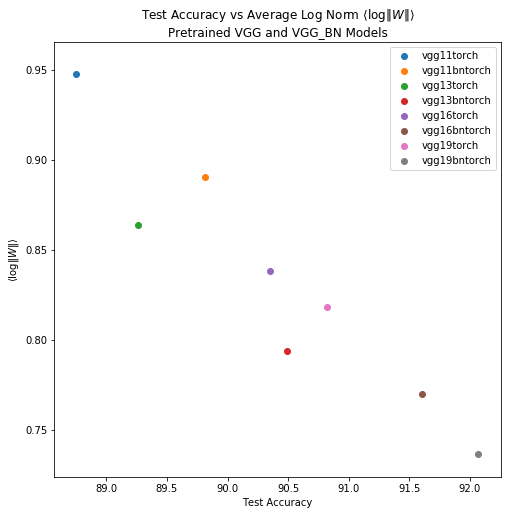

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

for modelname, accuracy in accuracies5.items():
    x = accuracy
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y = summary[0]["lognorm"]
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log Norm $\langle\log\Vert W\Vert\rangle$"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

Let's compare the average Log Norm with the average Log Norm compound:

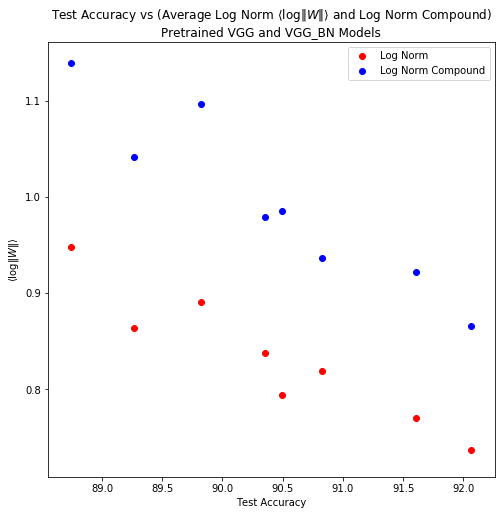

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

x = []
y1, y2 = [], []
for modelname, accuracy in accuracies5.items():
    x.append(accuracy)
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y1.append(summary[0]["lognorm"])
    y2.append(summary[0]["lognorm_compound"])
    label = modelname
plt.scatter(x,y1,label="Log Norm", color='r')
plt.scatter(x,y2,label="Log Norm Compound", color='b')

plt.legend()
plt.title(r"Test Accuracy vs (Average Log Norm $\langle\log\Vert W\Vert\rangle$ and Log Norm Compound)"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

### 3.2 Power law fitting (Alpha) of Weight Matrices vs Accuracies of models

The linear relationship between the Power law fitting (Alpha) of the weight matrices and the accuracies of the models is demonstrated in the following graph:

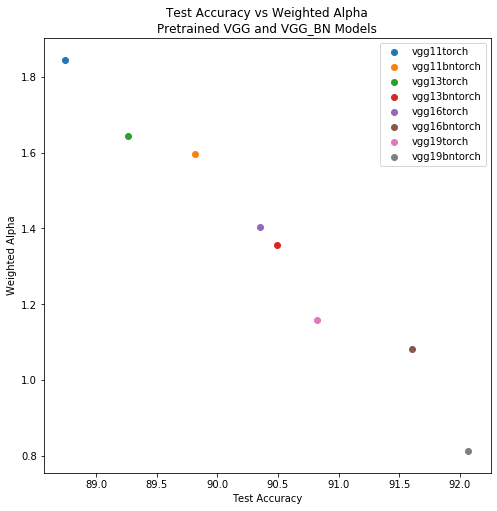

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

for modelname, accuracy in accuracies5.items():
    x = accuracy
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y = summary[0]["alpha_weighted"]
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Weighted Alpha"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Weighted Alpha");

The more accurate the model, the lower the exponent of the power law fit of the weight matrices is.

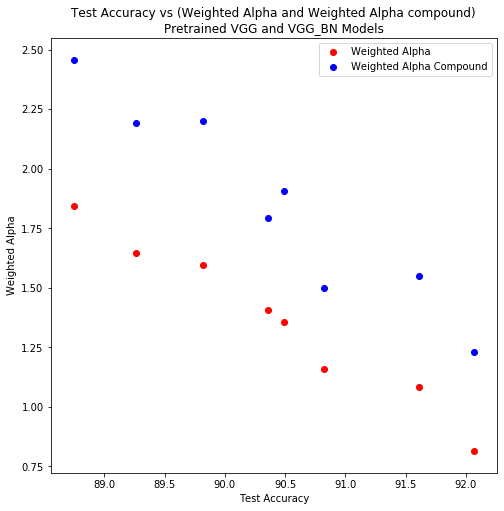

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

x = []
y1, y2 = [], []
for modelname, accuracy in accuracies5.items():
    x.append(accuracy)
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y1.append(summary[0]["alpha_weighted"])
    y2.append(summary[0]["alpha_weighted_compound"])
plt.scatter(x,y1,label="Weighted Alpha", color='r')
plt.scatter(x,y2,label="Weighted Alpha Compound", color='b')

plt.legend()
plt.title(r"Test Accuracy vs (Weighted Alpha and Weighted Alpha compound)"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Weighted Alpha");

'0.2.1'

### 4. Detailed Analysis of VGG


In [ ]:
ww.__version__


In [117]:

import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)



In [125]:
model_11 = models.vgg11(pretrained=True)
watcher = ww.WeightWatcher(model=model_11, logger=logger)
results_11 = watcher.analyze(alphas=True)
summary_11 = watcher.get_summary(pandas=True)
display(summary_11)
details_11 = watcher.get_details(results=results_11)
details_11.drop(columns=['slice', 'slice_count'], inplace=True)
details_11.dropna(inplace=True)
display(details_11.head())

INFO:__main__:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:__main__:Analyzing model
DEBUG:__main__:Layer 1: VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

DEBUG:__main__:    Weight matrix 4/9 (128,256): Alpha: 2.576077238558769, Alpha Weighted: 1.6520572774911981, D: 0.133132943439495
DEBUG:__main__:    Weight matrix 4/9 (128,256): Lognorm: 0.8396487832069397
DEBUG:__main__:    Weight matrix 5/9 (128,256): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (128,256): Alpha: 2.5337249999767604, Alpha Weighted: 2.2415200586217683, D: 0.12604047603275326
DEBUG:__main__:    Weight matrix 5/9 (128,256): Lognorm: 0.9509152770042419
DEBUG:__main__:    Weight matrix 6/9 (128,256): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (128,256): Alpha: 1.615083583562476, Alpha Weighted: 1.0727975403406367, D: 0.12912543499597612
DEBUG:__main__:    Weight matrix 6/9 (128,256): Lognorm: 0.8459222912788391
DEBUG:__main__:    Weight matrix 7/9 (128,256): Analyzing ...
DEBUG:__main__:    Weight matrix 7/9 (128,256): Alpha: 1.664928709624092, Alpha Weighted: 0.6363944562361387, D: 0.1549378605089503
DEBUG:__main__:    Weight matrix 7/9 (128,256): Lognorm:

DEBUG:__main__:    Weight matrix 3/9 (512,512): Lognorm: 0.9823008179664612
DEBUG:__main__:    Weight matrix 4/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 4/9 (512,512): Alpha: 2.7469945928755637, Alpha Weighted: 2.139472885682934, D: 0.05741479262466076
DEBUG:__main__:    Weight matrix 4/9 (512,512): Lognorm: 0.9806458353996277
DEBUG:__main__:    Weight matrix 5/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (512,512): Alpha: 2.40742308849171, Alpha Weighted: 2.3368157721467253, D: 0.062303956634809976
DEBUG:__main__:    Weight matrix 5/9 (512,512): Lognorm: 1.024043083190918
DEBUG:__main__:    Weight matrix 6/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (512,512): Alpha: 3.302657328288202, Alpha Weighted: 2.5299423152717266, D: 0.0500698108501777
DEBUG:__main__:    Weight matrix 6/9 (512,512): Lognorm: 0.9784256815910339
DEBUG:__main__:    Weight matrix 7/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 7/9 (512,512): Alp

DEBUG:__main__:    Weight matrix 1/1 (4096,25088): Lognorm: 1.758880853652954
DEBUG:__main__:Layer 26: ReLU(inplace)
DEBUG:__main__:Layer 26: Skipping (Layer not supported)
DEBUG:__main__:Layer 27: Dropout(p=0.5)
DEBUG:__main__:Layer 27: Skipping (Layer not supported)
DEBUG:__main__:Layer 28: Linear(in_features=4096, out_features=4096, bias=True)
DEBUG:__main__:Layer 28: Analyzing 1 weight matrices...
DEBUG:__main__:    Weight matrix 1/1 (4096,4096): Analyzing ...
DEBUG:__main__:    Weight matrix 1/1 (4096,4096): Alpha: 2.167513738036675, Alpha Weighted: 3.8585291581042744, D: 0.030891252864063246
DEBUG:__main__:    Weight matrix 1/1 (4096,4096): Lognorm: 1.6416341066360474
DEBUG:__main__:Layer 29: ReLU(inplace)
DEBUG:__main__:Layer 29: Skipping (Layer not supported)
DEBUG:__main__:Layer 30: Dropout(p=0.5)
DEBUG:__main__:Layer 30: Skipping (Layer not supported)
DEBUG:__main__:Layer 31: Linear(in_features=4096, out_features=1000, bias=True)
DEBUG:__main__:Layer 31: Analyzing 1 weight ma

,norm,norm_compound,lognorm,lognorm_compound,alpha,alpha_compound,alpha_weighted,alpha_weighted_compound
0,10.107157,19.885963,0.947498,1.138648,2.572493,2.537005,1.843995,2.458193


INFO:__main__:### Printing results ###
DEBUG:__main__:Layer 5: Norm compound: 5.895910263061523
DEBUG:__main__:Layer 5: LogNorm compound: 0.7691774368286133
DEBUG:__main__:Layer 5: Alpha compound: 1.522580930995347
DEBUG:__main__:Layer 5: Alpha Weighted compound: 1.0634833104417167
DEBUG:__main__:Layer 8: Norm compound: 6.683967113494873
DEBUG:__main__:Layer 8: LogNorm compound: 0.8212912082672119
DEBUG:__main__:Layer 8: Alpha compound: 2.0207002788632304
DEBUG:__main__:Layer 8: Alpha Weighted compound: 1.1427920476540687
DEBUG:__main__:Layer 10: Norm compound: 7.619507789611816
DEBUG:__main__:Layer 10: LogNorm compound: 0.8811509013175964
DEBUG:__main__:Layer 10: Alpha compound: 2.159670978680439
DEBUG:__main__:Layer 10: Alpha Weighted compound: 1.0371089622425371
DEBUG:__main__:Layer 13: Norm compound: 8.830634117126465
DEBUG:__main__:Layer 13: LogNorm compound: 0.9451767802238464
DEBUG:__main__:Layer 13: Alpha compound: 2.6599751390253275
DEBUG:__main__:Layer 13: Alpha Weighted comp

,layer_type,N,M,level,comment,norm,lognorm,alpha,alpha_weighted
layer_id,,,,,,,,,
5,CONV2D,128,64,LEVEL.SLICE,Slice level,5.54028,0.743532,1.65014,1.07665
5,CONV2D,128,64,LEVEL.SLICE,Slice level,6.0134,0.77912,1.57297,1.16638
5,CONV2D,128,64,LEVEL.SLICE,Slice level,5.67136,0.753687,1.4121,0.895458
5,CONV2D,128,64,LEVEL.SLICE,Slice level,5.86407,0.768199,1.43459,0.94487
5,CONV2D,128,64,LEVEL.SLICE,Slice level,7.03509,0.84727,1.6185,1.561


In [139]:
details_11['NxM'] = pd.to_numeric(details_11.N * details_11.M)
display(details_11.head())

,layer_type,N,M,level,comment,norm,lognorm,alpha,alpha_weighted,NxM
layer_id,,,,,,,,,,
5,CONV2D,128,64,LEVEL.SLICE,Slice level,5.54028,0.743532,1.65014,1.07665,8192
5,CONV2D,128,64,LEVEL.SLICE,Slice level,6.0134,0.77912,1.57297,1.16638,8192
5,CONV2D,128,64,LEVEL.SLICE,Slice level,5.67136,0.753687,1.4121,0.895458,8192
5,CONV2D,128,64,LEVEL.SLICE,Slice level,5.86407,0.768199,1.43459,0.94487,8192
5,CONV2D,128,64,LEVEL.SLICE,Slice level,7.03509,0.84727,1.6185,1.561,8192


Text(0, 0.5, 'alpha')

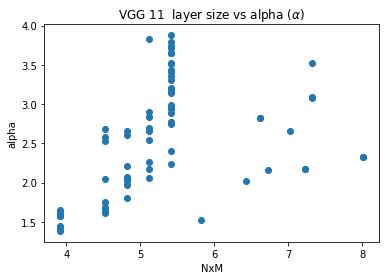

In [140]:
x = np.log10(details_11.NxM.to_numpy())
y = details_11.alpha.to_numpy()
plt.scatter(x,y)
plt.title(r"VGG 11  layer size vs alpha ($\alpha$)")
plt.xlabel('NxM')
plt.ylabel('alpha')

Text(0, 0.5, 'alpha')

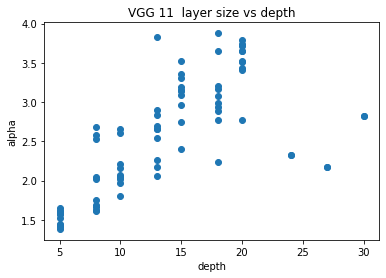

In [141]:
x = details_11.index.to_numpy()
y = details_11.alpha.to_numpy()
plt.scatter(x,y)
plt.title(r"VGG 11  layer size vs depth")
plt.xlabel('depth')
plt.ylabel('alpha')

In [126]:
model_13 = models.vgg13(pretrained=True)
watcher = ww.WeightWatcher(model=model_13, logger=logger)
results_13 = watcher.analyze(alphas=True)
summary_13 = watcher.get_summary(pandas=True)
display(summary_13)
details_13 = watcher.get_details(results=results_13)
details_13.drop(columns=['slice', 'slice_count'], inplace=True)
details_13.dropna(inplace=True)
display(details_13.head())

INFO:__main__:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:__main__:Analyzing model
DEBUG:__main__:Layer 1: VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1

DEBUG:__main__:    Weight matrix 3/9 (64,128): Lognorm: 0.6612639427185059
DEBUG:__main__:    Weight matrix 4/9 (64,128): Analyzing ...
DEBUG:__main__:    Weight matrix 4/9 (64,128): Alpha: 1.7804244107953249, Alpha Weighted: 0.9158587100252071, D: 0.1557509944471459
DEBUG:__main__:    Weight matrix 4/9 (64,128): Lognorm: 0.6933040618896484
DEBUG:__main__:    Weight matrix 5/9 (64,128): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (64,128): Alpha: 1.7223668128083331, Alpha Weighted: 1.2801291360661946, D: 0.14315025688733707
DEBUG:__main__:    Weight matrix 5/9 (64,128): Lognorm: 0.7414924502372742
DEBUG:__main__:    Weight matrix 6/9 (64,128): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (64,128): Alpha: 1.7330248755447897, Alpha Weighted: 0.9110641458044347, D: 0.14202299805469754
DEBUG:__main__:    Weight matrix 6/9 (64,128): Lognorm: 0.6887338161468506
DEBUG:__main__:    Weight matrix 7/9 (64,128): Analyzing ...
DEBUG:__main__:    Weight matrix 7/9 (64,128): Alpha: 1.81

DEBUG:__main__:    Weight matrix 3/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 3/9 (256,256): Alpha: 3.072085288559462, Alpha Weighted: 1.0791189177059968, D: 0.09978831257031451
DEBUG:__main__:    Weight matrix 3/9 (256,256): Lognorm: 0.8321912884712219
DEBUG:__main__:    Weight matrix 4/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 4/9 (256,256): Alpha: 3.04434009703647, Alpha Weighted: 1.5885952171494162, D: 0.09122357270973214
DEBUG:__main__:    Weight matrix 4/9 (256,256): Lognorm: 0.8481708765029907
DEBUG:__main__:    Weight matrix 5/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (256,256): Alpha: 3.423834630957338, Alpha Weighted: 2.4744256947845185, D: 0.06957180457999956
DEBUG:__main__:    Weight matrix 5/9 (256,256): Lognorm: 0.9025205969810486
DEBUG:__main__:    Weight matrix 6/9 (256,256): Analyzing ...
DEBUG:__main__:    Weight matrix 6/9 (256,256): Alpha: 3.1933722378218037, Alpha Weighted: 1.546795863739017, D: 0.08670652456

DEBUG:__main__:    Weight matrix 1/9 (512,512): Lognorm: 0.9932413101196289
DEBUG:__main__:    Weight matrix 2/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 2/9 (512,512): Alpha: 3.586872770204918, Alpha Weighted: 2.1468361875739195, D: 0.08012886952137144
DEBUG:__main__:    Weight matrix 2/9 (512,512): Lognorm: 1.0082613229751587
DEBUG:__main__:    Weight matrix 3/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 3/9 (512,512): Alpha: 3.0779288592378506, Alpha Weighted: 1.5116604314948319, D: 0.0627208911312393
DEBUG:__main__:    Weight matrix 3/9 (512,512): Lognorm: 0.9908903241157532
DEBUG:__main__:    Weight matrix 4/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 4/9 (512,512): Alpha: 3.787068655365929, Alpha Weighted: 2.410067408902185, D: 0.0587585215825307
DEBUG:__main__:    Weight matrix 4/9 (512,512): Lognorm: 0.9824333190917969
DEBUG:__main__:    Weight matrix 5/9 (512,512): Analyzing ...
DEBUG:__main__:    Weight matrix 5/9 (512,512): Alp

DEBUG:__main__:Layer 12: Alpha Weighted compound: 1.508835567105126
DEBUG:__main__:Layer 14: Norm compound: 7.068286895751953
DEBUG:__main__:Layer 14: LogNorm compound: 0.8488208055496216
DEBUG:__main__:Layer 14: Alpha compound: 2.9324900726788465
DEBUG:__main__:Layer 14: Alpha Weighted compound: 1.361677104373851
DEBUG:__main__:Layer 17: Norm compound: 8.520411491394043
DEBUG:__main__:Layer 17: LogNorm compound: 0.9300048351287842
DEBUG:__main__:Layer 17: Alpha compound: 2.611071601496579
DEBUG:__main__:Layer 17: Alpha Weighted compound: 1.3777809560439662
DEBUG:__main__:Layer 19: Norm compound: 9.485450744628906
DEBUG:__main__:Layer 19: LogNorm compound: 0.9768868684768677
DEBUG:__main__:Layer 19: Alpha compound: 3.1774177732008844
DEBUG:__main__:Layer 19: Alpha Weighted compound: 2.3009675942281937
DEBUG:__main__:Layer 22: Norm compound: 9.905954360961914
DEBUG:__main__:Layer 22: LogNorm compound: 0.9955974221229553
DEBUG:__main__:Layer 22: Alpha compound: 3.136712953305263
DEBUG:__

,norm,norm_compound,lognorm,lognorm_compound,alpha,alpha_compound,alpha_weighted,alpha_weighted_compound
0,8.58667,16.972939,0.864047,1.04089,2.689697,2.628755,1.645383,2.192307


INFO:__main__:### Printing results ###
DEBUG:__main__:Layer 4: Norm compound: 3.7364306449890137
DEBUG:__main__:Layer 4: LogNorm compound: 0.5716044902801514
DEBUG:__main__:Layer 4: Alpha compound: 1.6193138952563046
DEBUG:__main__:Layer 4: Alpha Weighted compound: 0.6126543377111549
DEBUG:__main__:Layer 7: Norm compound: 4.856048107147217
DEBUG:__main__:Layer 7: LogNorm compound: 0.6854791641235352
DEBUG:__main__:Layer 7: Alpha compound: 1.788024974756016
DEBUG:__main__:Layer 7: Alpha Weighted compound: 0.9529977998436279
DEBUG:__main__:Layer 9: Norm compound: 5.350394248962402
DEBUG:__main__:Layer 9: LogNorm compound: 0.7279879450798035
DEBUG:__main__:Layer 9: Alpha compound: 2.412351108517952
DEBUG:__main__:Layer 9: Alpha Weighted compound: 0.7522370217705565
DEBUG:__main__:Layer 12: Norm compound: 6.344095706939697
DEBUG:__main__:Layer 12: LogNorm compound: 0.8003528714179993
DEBUG:__main__:Layer 12: Alpha compound: 2.9670583014132306
DEBUG:__main__:Layer 12: Alpha Weighted compoun

,layer_type,N,M,level,comment,norm,lognorm,alpha,alpha_weighted
layer_id,,,,,,,,,
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.59271,0.555422,1.99857,0.530849
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.79124,0.578781,1.52277,0.703118
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.42438,0.534582,2.13697,0.638202
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.79945,0.579721,1.47758,0.662307
4,CONV2D,64,64,LEVEL.SLICE,Slice level,4.2281,0.626146,1.5489,0.870814


In [127]:
model_16 = models.vgg16(pretrained=True)
watcher = ww.WeightWatcher(model=model_16)
results_16 = watcher.analyze(alphas=True)
summary_16 = watcher.get_summary(pandas=True)
display(summary_16)
details_16 = watcher.get_details(results=results_16)
details_16.drop(columns=['slice', 'slice_count'], inplace=True)
details_16.dropna(inplace=True)
display(details_16.head())

2019-12-24 19:29:36,744 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 19:29:36,745 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 19:34:24,506 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 19:34:26,095 INFO Norm: min: 3.203004837036133, max: 51.2126579284668, avg: 7.801441669464111
INFO:weightwatcher.weightwatcher:Norm: min: 3.203004837036133, max: 51.2126579284668, avg: 7.801441669464111
2019-12-24 19:34:26,096 INFO Norm compound: min: 3.56429123878479, max: 51.2126579284668, avg: 14.09792709350586
INFO:weightwatcher.weightwatcher:Norm compo

,norm,norm_compound,lognorm,lognorm_compound,alpha,alpha_compound,alpha_weighted,alpha_weighted_compound
0,7.801442,14.097927,0.838187,0.979278,2.892338,2.767718,1.405073,1.793075


2019-12-24 19:34:26,136 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 19:34:27,653 INFO Norm: min: 3.203004837036133, max: 51.2126579284668, avg: 7.801441669464111
INFO:weightwatcher.weightwatcher:Norm: min: 3.203004837036133, max: 51.2126579284668, avg: 7.801441669464111
2019-12-24 19:34:27,654 INFO Norm compound: min: 3.56429123878479, max: 51.2126579284668, avg: 14.09792709350586
INFO:weightwatcher.weightwatcher:Norm compound: min: 3.56429123878479, max: 51.2126579284668, avg: 14.09792709350586
2019-12-24 19:34:27,655 INFO LogNorm: min: 0.5055575966835022, max: 1.7093772888183594, avg: 0.8381870985031128
INFO:weightwatcher.weightwatcher:LogNorm: min: 0.5055575966835022, max: 1.7093772888183594, avg: 0.8381870985031128
2019-12-24 19:34:27,656 INFO LogNorm compound: min: 0.5506355166435242, max: 1.7093772888183594, avg: 0.9792784452438354
INFO:weightwatcher.weightwatcher:LogNorm compound: min: 0.5506355166435242, max: 1.709377288818

,layer_type,N,M,level,comment,norm,lognorm,alpha,alpha_weighted
layer_id,,,,,,,,,
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.28156,0.516081,3.14242,1.03563
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.78437,0.577994,2.69269,1.43223
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.5147,0.545889,1.79157,0.60329
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.59088,0.555201,2.64471,1.39963
4,CONV2D,64,64,LEVEL.SLICE,Slice level,4.12886,0.61583,2.85539,1.8627


In [128]:
model_19 = models.vgg19(pretrained=True)
watcher = ww.WeightWatcher(model=model_19)
results_19 = watcher.analyze(alphas=True)
summary_19 = watcher.get_summary(pandas=True)
display(summary_19)
details_19 = watcher.get_details(results=results_19)
details_19.drop(columns=['slice', 'slice_count'], inplace=True)
details_19.dropna(inplace=True)
display(details_19.head())

2019-12-24 19:34:29,861 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-24 19:34:29,862 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-24 19:40:14,064 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 19:40:16,103 INFO Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
INFO:weightwatcher.weightwatcher:Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
2019-12-24 19:40:16,104 INFO Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
INFO:weightwatcher.weightwatche

,norm,norm_compound,lognorm,lognorm_compound,alpha,alpha_compound,alpha_weighted,alpha_weighted_compound
0,7.268448,12.337833,0.818506,0.936527,2.964673,2.847976,1.158888,1.500234


2019-12-24 19:40:16,138 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-24 19:40:18,147 INFO Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
INFO:weightwatcher.weightwatcher:Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
2019-12-24 19:40:18,148 INFO Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
INFO:weightwatcher.weightwatcher:Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
2019-12-24 19:40:18,150 INFO LogNorm: min: 0.507559061050415, max: 1.6810059547424316, avg: 0.8185057640075684
INFO:weightwatcher.weightwatcher:LogNorm: min: 0.507559061050415, max: 1.6810059547424316, avg: 0.8185057640075684
2019-12-24 19:40:18,150 INFO LogNorm compound: min: 0.5500112771987915, max: 1.6810059547424316, avg: 0.9365273714065552
INFO:weightwatcher.weightwatcher:LogNorm compound: min: 0.5500112771987915, max: 

,layer_type,N,M,level,comment,norm,lognorm,alpha,alpha_weighted
layer_id,,,,,,,,,
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.34719,0.524681,1.44335,0.374001
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.65029,0.562327,1.52803,0.60588
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.29998,0.518511,2.13373,0.535882
4,CONV2D,64,64,LEVEL.SLICE,Slice level,3.55341,0.550646,1.51759,0.565788
4,CONV2D,64,64,LEVEL.SLICE,Slice level,4.22471,0.625797,1.55643,0.895931


In [131]:
import torch
valid_types = [torch.nn.modules.conv.Conv2d, torch.nn.modules.linear.Linear]

num_layers = 0
for m in model_11.modules():
    if(type(m) in valid_types):
        num_layers +=1
        print(m)
        
num_layers

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Linear(in_features=25088, out_features=4096, bias=True)
Linear(in_features=4096, out_features=4096, bias=True)
Linear(in_features=4096, out_features=1000, bias=True)


11

In [132]:
num_layers = 0
for m in model_13.modules():
    if(type(m) in valid_types):
        num_layers +=1
        print(m)
        
num_layers

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Linear(in_features=25088, out_features=4096, bias=True)
Linear(in_features=4096, out_features=4096, bias=True)
Linear(in_features=4096, out_features=1000, bias=True)


13

In [133]:
num_layers = 0
for m in model_16.modules():
    if(type(m) in valid_types):
        num_layers +=1
        print(m)
        
num_layers

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Linear(in_features=25088, out_features=4096, bias=True)
Linear(in_features=4096, out_features=4096, bias=True)
Linear(in_f

16

In [134]:
num_layers = 0
for m in model_19.modules():
    if(type(m) in valid_types):
        num_layers +=1
        print(m)
        
num_layers

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), pa

19

Text(0, 0.5, 'alpha')

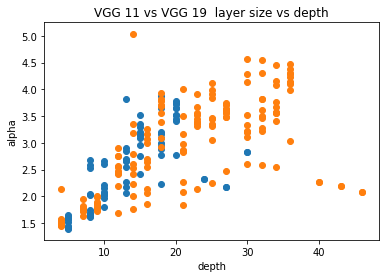

In [142]:
x = details_11.index.to_numpy()
y = details_11.alpha.to_numpy()
plt.scatter(x,y)

x = details_19.index.to_numpy()
y = details_19.alpha.to_numpy()
plt.scatter(x,y)

plt.title(r"VGG 11 vs VGG 19  layer size vs depth")
plt.xlabel('depth')
plt.ylabel('alpha')

Text(0.5, 0, 'alpha')

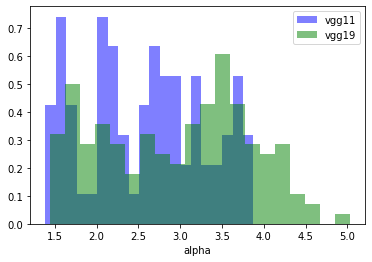

In [160]:
y = details_11.alpha.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='blue', label='vgg11', density=True);
y = details_19.alpha.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='green', label='vgg19', density=True);
plt.legend()
plt.xlabel("alpha")

Text(0.5, 0, 'alpha')

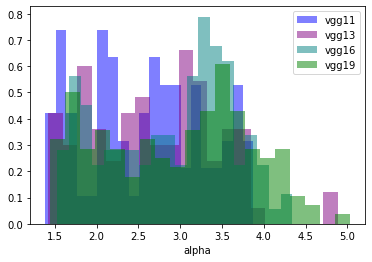

In [159]:
y = details_11.alpha.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='blue', label='vgg11', density=True);
y = details_13.alpha.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='purple', label='vgg13', density=True);
y = details_16.alpha.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='teal', label='vgg16', density=True);
y = details_19.alpha.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='green', label='vgg19', density=True);
plt.legend()
plt.xlabel("alpha")

Text(0.5, 0, 'lognorm')

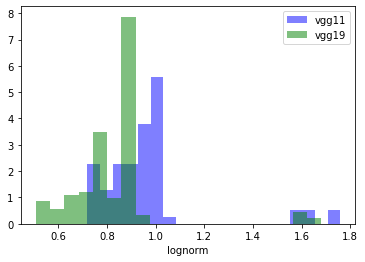

In [161]:
y = details_11.lognorm.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='blue', label='vgg11', density=True);
y = details_19.lognorm.to_numpy()
plt.hist(y, bins=20, alpha=0.5, color='green', label='vgg19', density=True);
plt.legend()
plt.xlabel("lognorm")

### TODO:  redo using neeew design, easier design

## 5. Conclusion

WeightWatcher helps you choose the best pretrained model for your needs.

You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.